<a href="https://colab.research.google.com/github/amontanor/MachineLearning/blob/main/Cuaderno3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

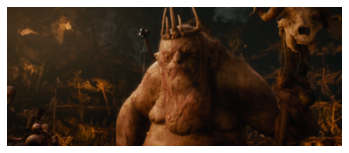

In [109]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
  numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
  (hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
  hist = hist.astype("float")
  hist /= hist.sum()
  # return the histogram
  return hist

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
imagePath = "images/Goblin-004.png"
image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [110]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

% de pixeles:  0.3136144578313253


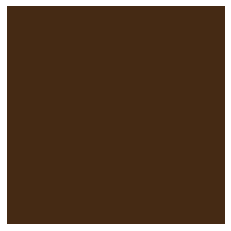

% de pixeles:  0.09984939759036145


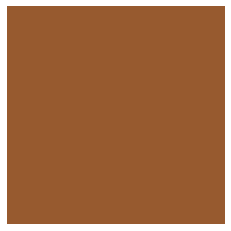

% de pixeles:  0.5865361445783133


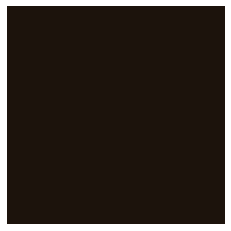

In [111]:
# cluster the pixel intensities
numClusters = 3

clt = KMeans(n_clusters = numClusters)
clt.fit(image)

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
#print("Centroides: ",clt.cluster_centers_)

for pos,cantidad in zip(range(numClusters),hist):
  cuadrado = np.zeros([50, 50, 3], dtype = "uint8") 
  Color = cv2.rectangle(cuadrado, (0, 0), (50, 50),clt.cluster_centers_[pos], -1)
  # show our color bart
  print("% de pixeles: ",cantidad)
  plt.figure()
  plt.axis("off")
  plt.imshow(Color)
  plt.show()